# Project 6: Normal Modes in a Cylindrical Waveguide
## 6.4 Exercises
***

Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

## Numerical Procedures - Eigenvalue Problem (EVP)

### Definitions of the Functions Used

In [2]:
def numerow2(a, b, ndiv, y0, y1, funk, K):
    """
    Solve the stationary Schrödinger equation using the Numerov-Cowell algorithm

    Parameters
    ----------
    a : float
        Starting point.
    b : float
        Endpoint.
    ndiv : int
        Number of intervals.
    y0 : float
        The initial value for y at x=a.
    y1 : float
        The initial value for y at x=a+h.
    funk : function
        A function representing the potential energy.
    K : float
        Wave vector.

    Returns
    -------
    xp : list
        The list of x values used in the numerical integration.
    yp : list
        The list of the corresponding wave function values.
    """
    h = (b - a) / ndiv
    xp = [a, a + h]
    yp = [y0, y1]
    for i in range(1, ndiv):
        xp.append(xp[i] + h)
        yp.append((2.0 * yp[i] * (1.0 - 5.0 * h * h * funk(xp[i], K) / 12.0)
        / (1.0 + h * h * funk(xp[i + 1], K) / 12.0)
                   - yp[i - 1] * (1.0 + h * h * funk(xp[i - 1], K) / 12.0)
                   / (1.0 + h * h * funk(xp[i + 1], K) / 12.0)))
    return xp, yp


# def bisection(xl, xr, eps, func):
#     if func(xr) * func(xl) > 0.0:
#         return 'no zero'
#     while (xr - xl) / 2.0 > eps:
#         x = (xr + xl) / 2.0
#         if fun(xr) * func(x) < 0.0:
#             xl = x
#         else:
#             xr = x
#     return (xr + xl) / 2

def bisection(xl, xr, eps, func):
    """
    Finds and returns a root of the given function within the specified
    tolerance using the bisection method.

    Parameters
    ----------
    xl : float
        The lower bound of the search interval.
    xr : float
        The upper bound of the search interval.
    eps : float
        The tolerance within which the root is found.
    func : function
        A Python function representing the equation whose root is to be found.
        This function should accept a single argument and return a float.

    Returns
    -------
    float
        An approximation to the root of the equation represented by the
        input function within the specified tolerance.
    """
    while xr - xl > eps:
        s = (xl + xr) / 2
        if func(s) == 0:
            return s
        elif func(xl) * func(s) < 0:
            xr = s
        else:
            xl = s
    return (xl + xr) / 2


def fiE(K):
    """
    Calculate the wave function for a given wave vector K.

    Parameters
    ----------
    K : float
        The wave vector.

    Returns
    -------
    float
        The wave function value.
    """
    x = x0
    yp1 = sqrt(x0)
    yp2 = sqrt(x0 + h)
    xx, phi = numerow2(x0, xE, n, yp1, yp2, k2, K)
    return phi[-1]

def k2(x, K):
    """
    Potential energy function for use in the Numerov-Cowells algorithm.

    Parameters
    ----------
    x : float
        Independent variable.
    K : float
        Wave vector.

    Returns
    -------
    float
        Potential energy at the given independent variable and wave vector.
    """
    return K * K + 1.0 / 4.0 / x / x

### General Parameters of the System

In [3]:
x0 = 0.001
xE = 1.0
n = 10000
h = (xE - x0) / n
Kmax = 20.0
dK = Kmax / 100.0
tol = Kmax / 10000.0

### Presentation of the Analyzed Wave Function

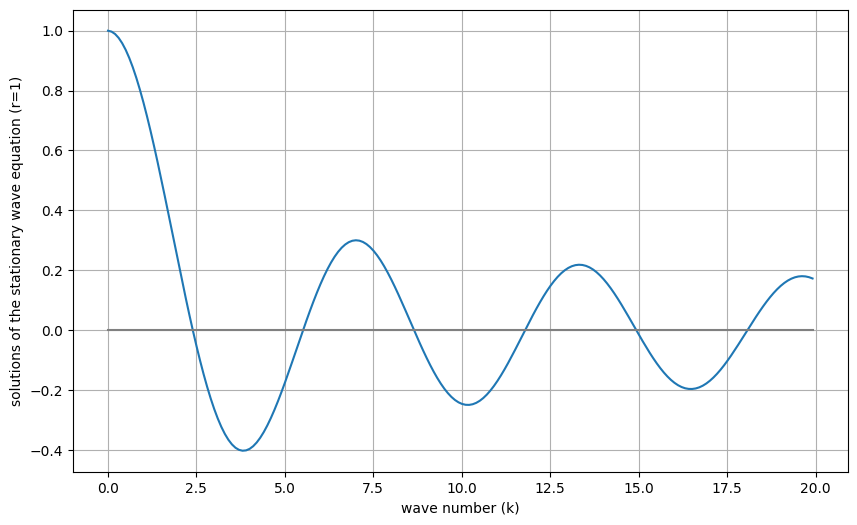

In [4]:
k_lst = []
fi_k = []
for k in np.arange(0.01, 20, 0.1):
    k_lst.append(k)
    fi_k.append(fiE(k))

plt.figure(figsize=(10, 6))
plt.plot(k_lst, fi_k)
plt.plot(k_lst, [0 for k in k_lst], 'gray')
plt.xlabel('wave number (k)')
plt.ylabel('solutions of the stationary wave equation (r=1)')
plt.grid()
plt.show()

## 6.4.1 Checking the Convergence of Results with Analytical Solutions <br> with Respect to the Grid Parameter (h)


In [5]:
Kmax = 13.0
dK = Kmax / 100.0
tol = Kmax / 10000.0

diff = []
analytic = [2.404826, 5.520078, 8.653728, 11.791534]
num = [1, 2, 3, 4]
h_lst = []

for n in [200, 225, 250, 300, 400, 500, 1000, 5000, 10000]:
    K1 = 0.001 * Kmax
    K2 = K1 + dK

    h = (xE - x0) / n
    h_lst.append(h)
    zero = []

    while K2 < Kmax:
        if fiE(K1) * fiE(K2) < 0.0:
            k = bisection(K1, K2, tol, fiE)
            zero.append(k)
        K1 = K2
        K2 = K1 + dK
    diff.append([abs(x - y) for x, y in zip(zero, analytic)])

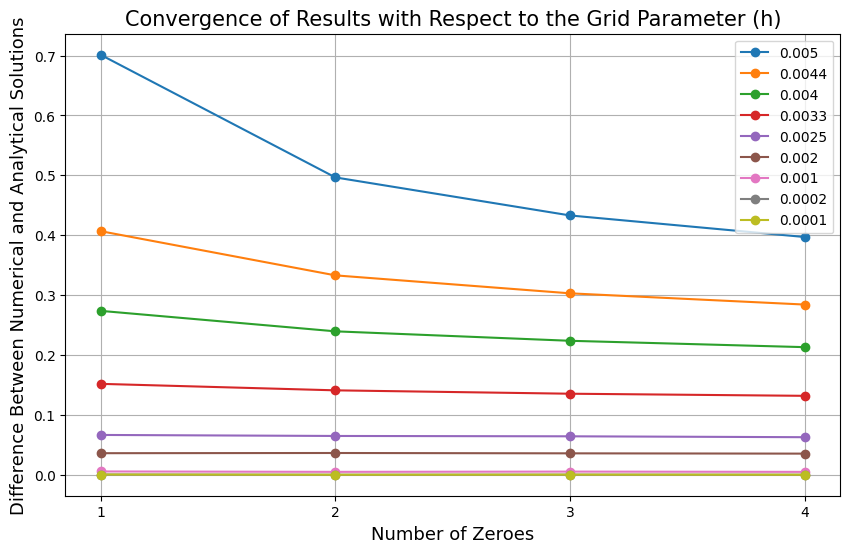

In [6]:
# visualization of the results of the calculations performed
plt.figure(figsize=(10, 6))
for idx in range(len(h_lst)):
    plt.plot(num, diff[idx], '-o', label=str(round(h_lst[idx], 4)))

plt.title('Convergence of Results with Respect to the Grid Parameter (h)', fontsize=15)
plt.xlabel('Number of Zeroes', fontsize=13)
plt.xticks([1, 2, 3, 4])
plt.ylabel('Difference Between Numerical and Analytical Solutions',
           fontsize=13)
plt.legend()
plt.grid()
plt.show()

## 6.4.2 Comparison of Numerically Determined Eigenvalues of the Wave Number  with Analytical Solutions


In [7]:
print('Analytical eigenvalues of the wave number:\n\n', analytic)
# numerical calculations performed in the previous exercise
print('\nNumerically determined eigenvalues of the wave number:\n\n', zero)


Analytical eigenvalues of the wave number:

 [2.404826, 5.520078, 8.653728, 11.791534]

Numerically determined eigenvalues of the wave number:

 [2.405304687499999, 5.520226562499996, 8.653429687499997, 11.791710937500017]


## 6.4.3. Modifying the Code to Present the Course <br> of Radial Functions of Normal Mode Amplitudes


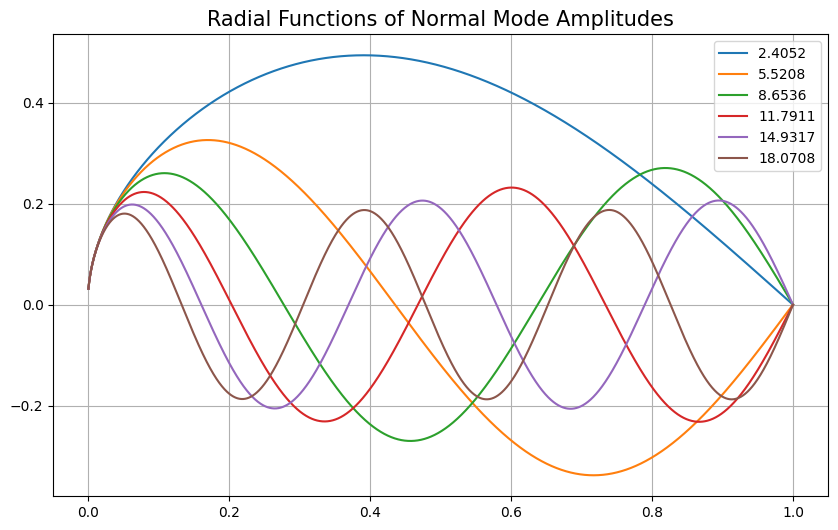

In [8]:
Kmax = 20.0
dK = Kmax / 100.
tol = Kmax / 10000.
K1 = 0.001 * Kmax
K2 = K1 + dK

plt.figure(figsize=(10, 6))
plt.title('Radial Functions of Normal Mode Amplitudes', fontsize=15)
while K2 < Kmax:
    if fiE(K1) * fiE(K2) < 0.0:
        k = bisection(K1, K2, tol, fiE)
        r, phi = numerow2(x0, xE, n, sqrt(x0), sqrt(x0 + h), k2, k)
        plt.plot(r, phi, label=str(round(k, 4)))
    K1 = K2
    K2 = K1 + dK

plt.legend()
plt.grid()
plt.show()